In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('llm_tokenized_symptoms.csv')

In [3]:
df

,Unnamed: 0,VAERS_ID,extracted_symptoms
0,0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ..."
1,1,2729004,"['micro-seizures', 'seizures', 'arrest in spee..."
2,2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
3,3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
4,4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
...,...,...,...
16823,16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ..."
16824,16824,2733820,"['COVID-19', 'pneumonia']"
16825,16825,2733821,['type 1 diabetes']
16826,16826,2737168,[]


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,VAERS_ID,extracted_symptoms
0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ..."
1,2729004,"['micro-seizures', 'seizures', 'arrest in spee..."
2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
...,...,...
16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ..."
16824,2733820,"['COVID-19', 'pneumonia']"
16825,2733821,['type 1 diabetes']
16826,2737168,[]


In [7]:
df = df[['VAERS_ID', 'extracted_symptoms']]

In [11]:
df1 = df[df['extracted_symptoms'].apply(lambda x: bool(x) and len(x) > 0)]


In [9]:
# Filter DataFrame to keep rows where 'SYMPTOM_LIST' is non-empty and contains valid items
df1 = df[df['extracted_symptoms'].apply(lambda x: isinstance(x, list) and len(x) > 0 and any(item.strip() for item in x))]


In [12]:

df1

,VAERS_ID,extracted_symptoms
0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ..."
1,2729004,"['micro-seizures', 'seizures', 'arrest in spee..."
2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe..."
...,...,...
16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ..."
16824,2733820,"['COVID-19', 'pneumonia']"
16825,2733821,['type 1 diabetes']
16826,2737168,[]


In [13]:
import ast

# Clean the strings and convert to lists
df1['SYMPTOM_LIST'] = df1['extracted_symptoms'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)

# Alternatively, if you just want to strip the brackets and split the symptoms:
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].apply(lambda x: x.strip('[]').split(', ') if isinstance(x, str) else x)

# Print to check the updated SYMPTOM_LIST
print(df1[['VAERS_ID', 'SYMPTOM_LIST']])


       VAERS_ID                                       SYMPTOM_LIST
0       2728994  [muscle pain, arm soreness, pain, activities o...
1       2729004  [micro-seizures, seizures, arrest in speech, e...
2       2729006      [endocarditis, fever, chills, lung infection]
3       2729006      [endocarditis, fever, chills, lung infection]
4       2729006      [endocarditis, fever, chills, lung infection]
...         ...                                                ...
16823   2733817  [weakness, malaise, arm pain, chills, fever, i...
16824   2733820                              [COVID-19, pneumonia]
16825   2733821                                  [type 1 diabetes]
16826   2737168                                                 []
16827   2737595                             [fever, rash, fatigue]

[16828 rows x 2 columns]


In [14]:
df1

,VAERS_ID,extracted_symptoms,SYMPTOM_LIST
0,2728994,"['muscle pain', 'arm soreness', 'pain', 'activ...","[muscle pain, arm soreness, pain, activities o..."
1,2729004,"['micro-seizures', 'seizures', 'arrest in spee...","[micro-seizures, seizures, arrest in speech, e..."
2,2729006,"['endocarditis', 'fever', 'chills', 'lung infe...","[endocarditis, fever, chills, lung infection]"
3,2729006,"['endocarditis', 'fever', 'chills', 'lung infe...","[endocarditis, fever, chills, lung infection]"
4,2729006,"['endocarditis', 'fever', 'chills', 'lung infe...","[endocarditis, fever, chills, lung infection]"
...,...,...,...
16823,2733817,"['weakness', 'malaise', 'arm pain', 'chills', ...","[weakness, malaise, arm pain, chills, fever, i..."
16824,2733820,"['COVID-19', 'pneumonia']","[COVID-19, pneumonia]"
16825,2733821,['type 1 diabetes'],[type 1 diabetes]
16826,2737168,[],[]


In [16]:
# Length of symptom texts
# df['SYMPTOM_TEXT_LENGTH'] = df['SYMPTOM_TEXT'].str.len()
df1['SYMPTOM_LIST_LENGTH'] = df1['SYMPTOM_LIST'].apply(lambda x: len(x))  # Assumes string representation of a list
print("\nLength of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.")


Length of SYMPTOM_TEXT and SYMPTOM_LIST added to DataFrame.


In [82]:
# Filter out rows where 'SYMPTOM_LIST' is exactly "[]"
df1 = df[df['SYMPTOM_LIST'] != "[]"]

for symptom_list in df1['SYMPTOM_LIST']:
    x = symptom_list.strip('[]')
    symptoms = [symptom.strip().strip("'") for symptom in x.split(',')]
    print(symptoms)



['sore', 'muscle pain', 'muscle pain', 'sore', 'pain', 'muscle pain', 'pain', 'muscle pain', 'pain', 'muscle pain', 'pain', 'sore']
['Seizures', 'seizure', 'auto-immune disease', 'Encephalitis']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['Endocarditis', 'strep mitis', 'fever', 'chills']
['12/30/23 Fever', 'aches', 'pains', 'fatigue', 'chills', 'sweats', 'diarrhea', 'loss of appetite', 'Fever', 'fatigue', 'diarhea', 'loss of appetite']
['shoulder pain', 'PCP']
['fog']
['respiratory failure', 'GERD', 'HTN', 'shortness of breath', 'fevers', 'respiratory distress', 'Sepsis', 'Pneumonia', 'infections', 'tachycardia', 'hypotensive', 'Urinary incontinence', 'urinary retention', 'incontinence', 'Hypomagnesemia', 'trauma', 'left shoulder pain', 'Anxiety', 'GERD']
['floaters', 'retinal tear', 'floaters', 'retinal tear']
['hypertension hyperlipidemia diabetes mellitus', 'nonobstructive coronary artery disease', 'congestive heart failure 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# 1. Basic Overview
print("First few rows of the dataset:")
print(df1.head())




First few rows of the dataset:
   VAERS_ID                                 extracted_symptoms   
0   2728994  ['muscle pain', 'arm soreness', 'pain', 'activ...  \
1   2729004  ['micro-seizures', 'seizures', 'arrest in spee...   
2   2729006  ['endocarditis', 'fever', 'chills', 'lung infe...   
3   2729006  ['endocarditis', 'fever', 'chills', 'lung infe...   
4   2729006  ['endocarditis', 'fever', 'chills', 'lung infe...   

                                        SYMPTOM_LIST  SYMPTOM_LIST_LENGTH  
0  [muscle pain, arm soreness, pain, activities o...                    4  
1  [micro-seizures, seizures, arrest in speech, e...                    7  
2      [endocarditis, fever, chills, lung infection]                    4  
3      [endocarditis, fever, chills, lung infection]                    4  
4      [endocarditis, fever, chills, lung infection]                    4  


In [18]:
# 2. Summary Statistics
print("\nData types and non-null counts:")
print(df1.info())
print("\nDescriptive statistics:")
print(df1.describe(include='all'))


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16828 entries, 0 to 16827
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   VAERS_ID             16828 non-null  int64 
 1   extracted_symptoms   16828 non-null  object
 2   SYMPTOM_LIST         16828 non-null  object
 3   SYMPTOM_LIST_LENGTH  16828 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 526.0+ KB
None

Descriptive statistics:
            VAERS_ID extracted_symptoms SYMPTOM_LIST  SYMPTOM_LIST_LENGTH
count   1.682800e+04              16828        16828         16828.000000
unique           NaN               8569         8569                  NaN
top              NaN                 []           []                  NaN
freq             NaN               3028         3028                  NaN
mean    2.765639e+06                NaN          NaN             2.794212
std     2.309334e+04                NaN

In [22]:
df1 = df1[['VAERS_ID', 'SYMPTOM_LIST', 'SYMPTOM_LIST_LENGTH']]

In [24]:

# 3. Missing Values
print("\nMissing values in each column:")
print(df1.isnull().sum())



Missing values in each column:
VAERS_ID               0
SYMPTOM_LIST           0
SYMPTOM_LIST_LENGTH    0
dtype: int64


In [25]:
# 4. Data Distribution
# Value counts of symptoms
print("\nValue counts for symptom lists:")
print(df1['SYMPTOM_LIST'].value_counts().head(10))  # Top 10 most frequent symptoms



Value counts for symptom lists:
SYMPTOM_LIST
[]                                 3028
[COVID-19]                          542
[death]                             187
[COVID-19, drug ineffective]        138
[drug ineffective, COVID-19]        125
[COVID-19, vaccination failure]     107
[rash]                              106
[tinnitus]                          104
[COVID-19, vaccine failure]         101
[covid-19, drug ineffective]         59
Name: count, dtype: int64


In [26]:
df1

,VAERS_ID,SYMPTOM_LIST,SYMPTOM_LIST_LENGTH
0,2728994,"[muscle pain, arm soreness, pain, activities o...",4
1,2729004,"[micro-seizures, seizures, arrest in speech, e...",7
2,2729006,"[endocarditis, fever, chills, lung infection]",4
3,2729006,"[endocarditis, fever, chills, lung infection]",4
4,2729006,"[endocarditis, fever, chills, lung infection]",4
...,...,...,...
16823,2733817,"[weakness, malaise, arm pain, chills, fever, i...",8
16824,2733820,"[COVID-19, pneumonia]",2
16825,2733821,[type 1 diabetes],1
16826,2737168,[],0


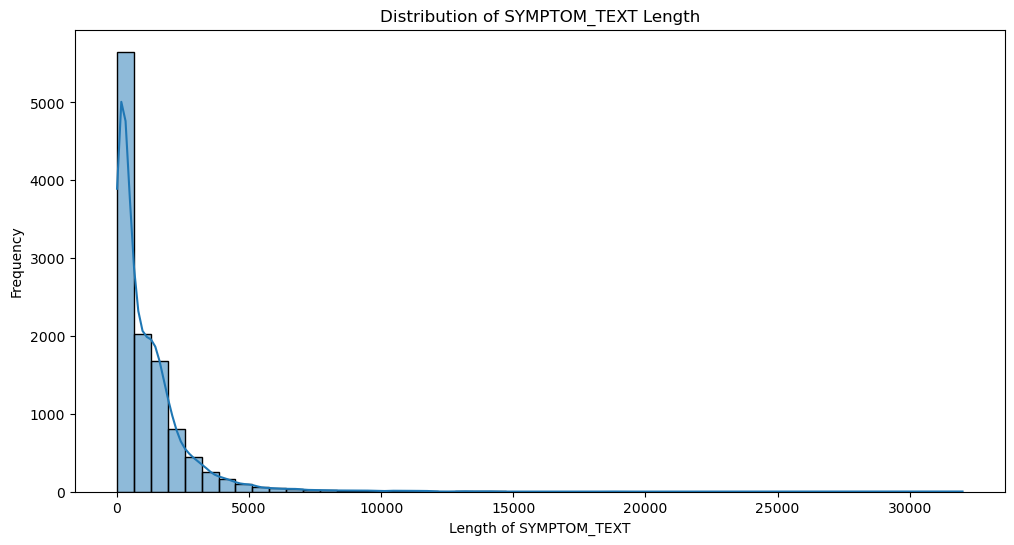

In [89]:

# Visualizing lengths
plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_TEXT_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_TEXT Length')
plt.xlabel('Length of SYMPTOM_TEXT')
plt.ylabel('Frequency')
plt.show()

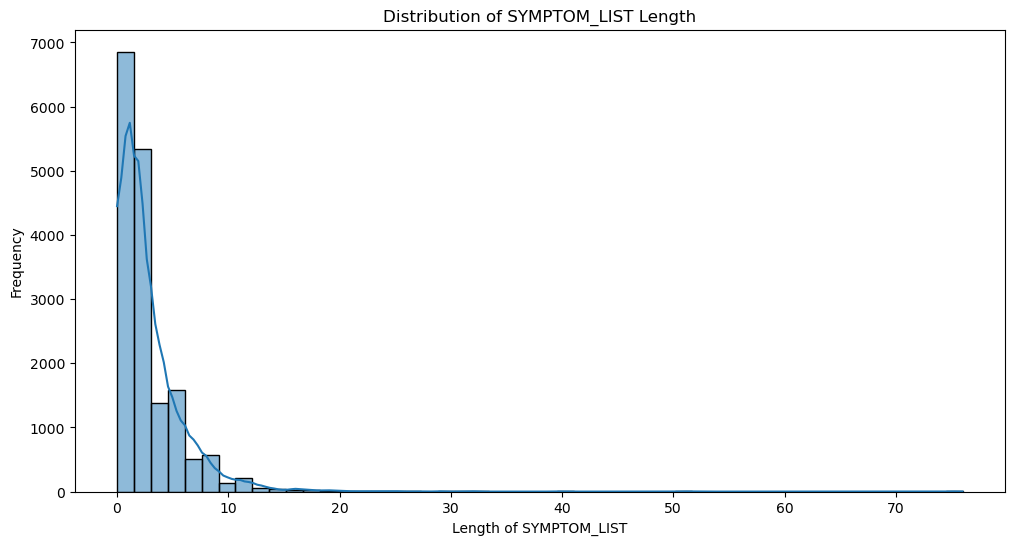

In [27]:

plt.figure(figsize=(12, 6))
sns.histplot(df1['SYMPTOM_LIST_LENGTH'], bins=50, kde=True)
plt.title('Distribution of SYMPTOM_LIST Length')
plt.xlabel('Length of SYMPTOM_LIST')
plt.ylabel('Frequency')
plt.show()

In [92]:
# 6. Data Quality Checks
# Check for string quality
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower() 
df1['SYMPTOM_LIST'] = df1['SYMPTOM_LIST'].str.lower()  # Convert to lowercase


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.strip()  # Remove leading/trailing whitespace
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].str.lower()
/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/163987829.py:5: SettingWithCopyWarning: 
A valu

In [93]:
df1

,VAERS_ID,SYMPTOM_TEXT,SYMPTOM_LIST,SYMPTOM_TEXT_LENGTH,SYMPTOM_LIST_LENGTH
0,2728994,muscle at the injection site is sore; he canno...,"['sore', 'muscle pain', 'muscle pain', 'sore',...",1916,131
1,2729004,micro-seizures starting approximately 2 weeks ...,"['seizures', 'seizure', 'auto-immune disease',...",645,62
2,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
3,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
4,2729006,"on september 14, 2023, i was admitted to hospi...","['endocarditis', 'strep mitis', 'fever', 'chil...",709,50
...,...,...,...,...,...
17396,2802200,"very sore arm and swelling. large, hard lump a...","['sore', 'swelling']",159,20
17415,2802224,within 1 hour of vaccine pt. had (l) calf and ...,['pain'],215,8
17416,2802168,menstrual cycle stopped; fertility issues; thi...,"['infertility', 'amenorrhea']",1942,29
17417,2802232,vitiligo; this spontaneous report received fro...,"['vitiligo', 'vitiligo']",754,24


NameError: name 'symptom_counts' is not defined

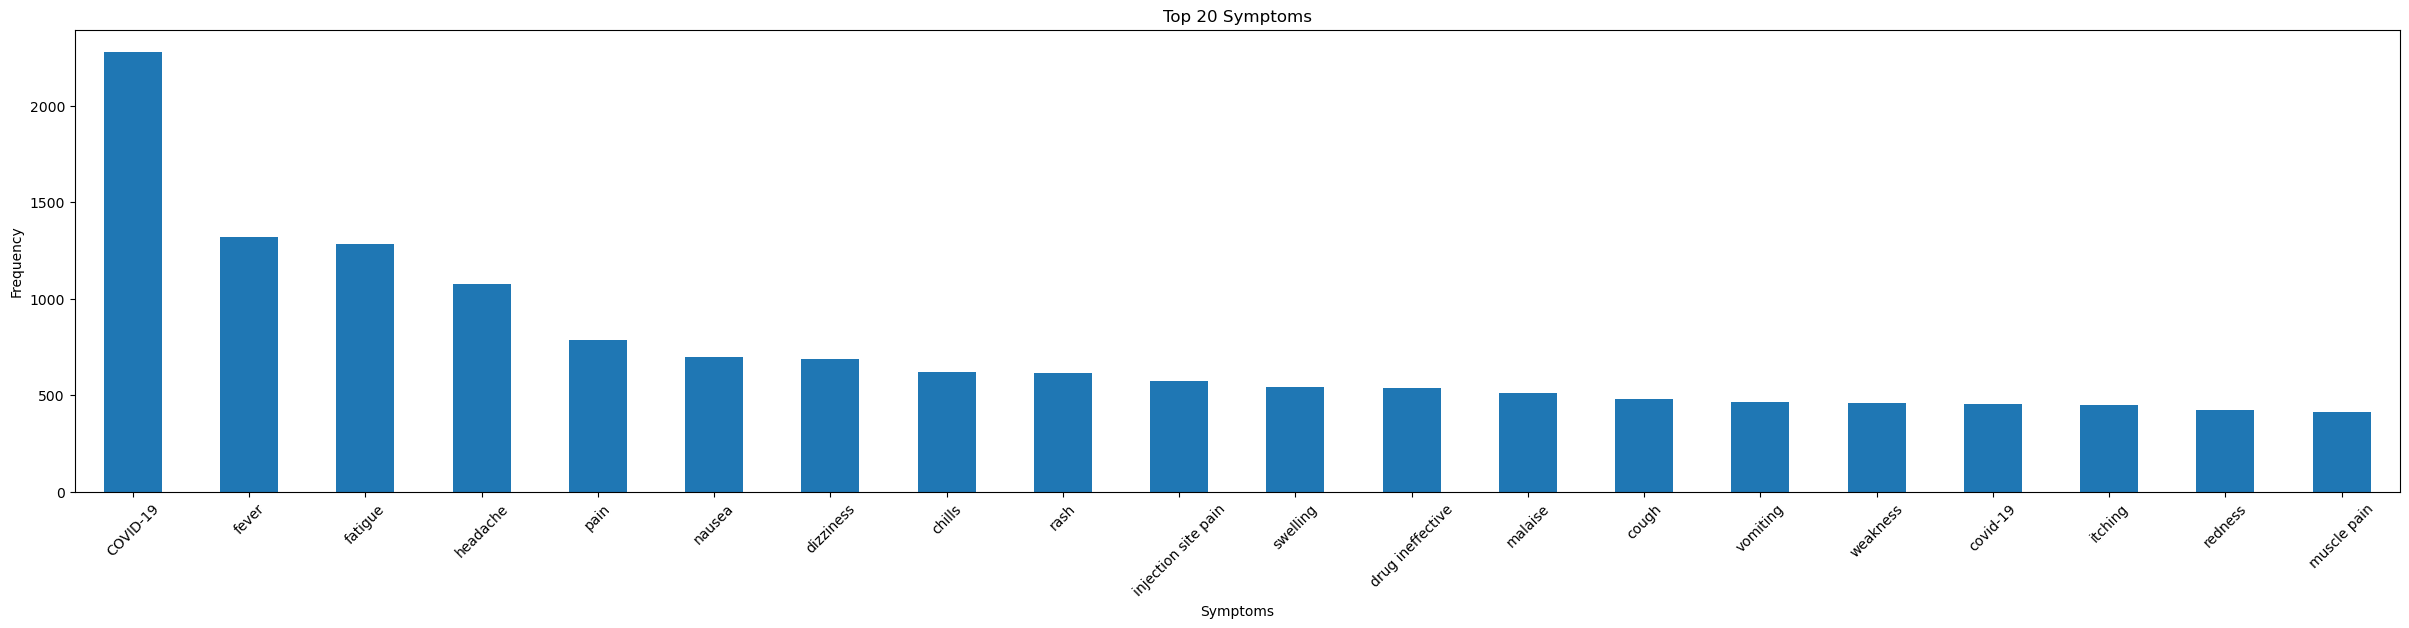

In [39]:

# 7. Visualizations
# Distribution of symptoms
symptom_counts = df1['SYMPTOM_LIST'].explode().value_counts()
plt.figure(figsize=(30, 6))
symptom_counts[0:20].plot(kind='bar')
plt.title('Top 20 Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df1.SYMPTOM_LIST.explode().t

0                                muscle pain
0                               arm soreness
0                                       pain
0        activities of daily living impaired
1                             micro-seizures
                        ...                 
16825                        type 1 diabetes
16826                                    NaN
16827                                  fever
16827                                   rash
16827                                fatigue
Name: SYMPTOM_LIST, Length: 50049, dtype: object

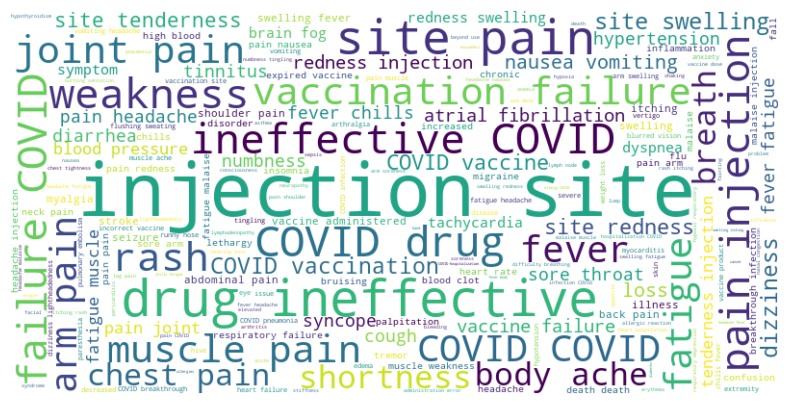

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to evaluate the string representation of a list and remove duplicates
# def get_unique_symptoms(symptom_list_str):
#     try:
#         # Convert string representation of list to an actual list
#         symptoms = eval(symptom_list_str)
#         # Remove duplicates and return as a space-separated string
#         unique_symptoms = set(symptoms)
#         return ' '.join(unique_symptoms)
#     except (SyntaxError, NameError):  # Handle any potential errors in eval
#         return ''

# Apply the function to the SYMPTOM_LIST column
unique_symptoms_list = df1['SYMPTOM_LIST'].explode().dropna().astype(str).to_list()
text_for_word_cloud = ' '.join(unique_symptoms_list)


# Combine all unique symptoms into a single string
text_for_word_cloud = ' '.join(unique_symptoms_list)

excluded_words = {'COVID', 'COVID COVID', 'COVID drug'}

# Remove excluded words from the text
filtered_text = ' '.join(word for word in text_for_word_cloud.split() if word not in excluded_words)

# Generate the word cloud with filtered text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [97]:

# 8. Correlation and Relationships
# Group by VAERS_ID to see if multiple entries relate to the same individual
grouped_df1 = df1.groupby('VAERS_ID')['SYMPTOM_LIST'].apply(list).reset_index()
print("\nGrouped symptoms by VAERS_ID:")
print(grouped_df1.head())

# 9. Prepare for NLP
# Example of preparing text for NLP (text cleaning, tokenization, etc.)
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have NLTK stopwords downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)

print("\nCleaned SYMPTOM_TEXT added to DataFrame.")


Grouped symptoms by VAERS_ID:
   VAERS_ID                                       SYMPTOM_LIST
0   2728994  [['sore', 'muscle pain', 'muscle pain', 'sore'...
1   2729004  [['seizures', 'seizure', 'auto-immune disease'...
2   2729006  [['endocarditis', 'strep mitis', 'fever', 'chi...
3   2729010  [['12/30/23 fever', 'aches', 'pains', 'fatigue...
4   2729014                         [['shoulder pain', 'pcp']]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/snehadharne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cleaned SYMPTOM_TEXT added to DataFrame.


/var/folders/ck/hmsclsfj6y1d_pbb28pqpv_h0000gn/T/ipykernel_71055/1456338071.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLEANED_SYMPTOM_TEXT'] = df1['SYMPTOM_TEXT'].apply(clean_text)
